<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 120px">

# 
### Fill out this cell as the project progresses, then move to README.md as technical report.

*Deval Mehta*

## Table of Contents
1) [Overview](#Overview) 
2) [Data](#Data-Dictionary)
3) [Requirements](#Requirements)
4) [Executive Summary](#Executive-Summary)
    1) [Purpose](#Purpose)
    2) [Methods](#Methods)
    3) [Findings](#Findings)
    4) [Next Steps](#Next-Steps)

## Overview
**Problem Statement**: Provided with a wealth of information regarding the attributes of various homes listed for sale in Ames, IA, can we reliably predict the a fair price for a new listing?

## Data Dictionary

### Original Features
The original dataset contains 79 non-index, non-price features, each introducing a different piece of information regarding a listing.

| Variable | Data Type | Description | Notes |
|---|---|---|---|
| MS SubClass | `int64` | The classification of the building | Codified to numbers; see the original data documentation for the cipher |
| MS Zoning | `string` | General zoning classification of the sale | Codified into strings; see the original data documentation for the cipher |
| Lot Frontage | `float64` | Linear feet of street connected to the property | |
| Lot Area | `int64` | Lot size in square feet | |
| Street | `string` | Type of road access to property | Gravel or Paved |
| Alley | `string` | Type of alley access to property | Gravel or Paved |
| Lot Shape | `string` | General shape of property | Degree of irregularity |
| Land Contour | `string` | Flatness of the property | Level, Banked, Hillside, or Low Depression |
| Utilities | `string` | Type of utilities available | Electric, Gas, Water, Sewer |
| Lot Config | `string` | Lot Configuration | Where on a block or in a neighborhood the lot lands |
| Land Slope | `string` | Slope of the property | Categorized from "gentle" to "severe" |
| Neighborhood | `string` | Physical locations within Ames city limits | |
| Condition 1 | `string` | Proximity to main road or railroad | |
| Condition 2 | `string` | Proximity to main road or railroad | if a second is present |
| Bldg Type | `string` | Type of dwelling | More modern classification than MS SubClass |
| House Style | `string` | Style of dwelling | Number of stories |
| Overall Qual | `int64` | Overal material and finish quality | Scale 1 - 10 |
| Overall Cond | `int64` | Overall condition rating | Scale 1 - 10 |
| Year Built | `int64` | Original construction date | |
| Year Remod/Add | `int64` | Remodel date | Same as construction date if no remodeling or additions |
| Roof Style | `string` | Type of roof | |
| Roof Matl | `string` | Roofing material | |
| Exterior 1st | `string` | Exterior covering on house | |
| Exterior 2nd | `string` | Exterior covering on house | if more than one material |
| Mas Vnr Type | `string` | Masonry veneer type | |
| Mas Vnr Area | `int64` | Masonry veneer area | |
| Exter Qual | `string` | Exterior material quality | Scale Poor to Excellent (six grades) |
| Exter Cond | `string` | Present condition of the material on the exterior | Same grading system as Exter Qual |
| Foundation | `string` | Type of foundation | |
| Bsmt Qual | `string` | Height of basement | |
| Bsmt Cond | `string` | General condition of basement | |
| Bsmt Exposure | `string` | Walkout or garden level basement walls | |
| BsmtFin Type 1 | `string` | Quality of basement finished area | |
| BsmtFin SF 1 | `int64` | Type 1 finished square footage | |
| BsmtFin Type 2 | `string` | Quality of second finished area (if present) | |
| BsmtFin SF 2 | `string` | Type 2 finished square feet | |
| Bsmt Unf SF | `int64` | Unfinished square feet of basement area | |
| Total Bsmt SF | `int64` | Total square feet of basement area | |
| Heating | `string` | Type of heating | |
| Heating QC | `string` | Heating quality and condition | |
| Central Air | `string` | Central air conditioning | |
| Electrical | `string` | Electrical system | |
| 1st Flr SF | `int64` | First floor square footage | |
| 2nd Flr SF | `int64` | Second floor square footage | if it exists |
| Low Qual Fin SF | `int64` | Low quality finished square footage | all floors |
| Gr Liv Area | `int64` | Above grade living area square footage | |
| Bsmt Full Bath | `int64` | Number of basement full bathrooms | |
| Bsmt Half Bath | `int64` | Number of basement half bathrooms | |
| Bedroom AbvGr | `int64` | Number of bedrooms above grade | |
| Kitchen AbvGr | `int64` | Number of kitchens above grade | |
| Kitchen Qual | `string` | Kitchen quality | |
| TotRms AbvGr | `int64` | Total rooms above grade | does not include bathrooms |
| Functional | `string` | Home functionality rating | |
| Fireplaces | `int64` | Number of fireplaces | |
| Fireplace Qu| `string` | Fireplace quality | |
| GarageType | `string` | Garage type and location | |
| Garage Yr Blt | `float64` | Year garage was built | |
| Garage Finish | `string` | Interior finish of the garage | |
| Garage Cars | `int64` | Car capacity of garage | |
| Garage Area | `int64` | Square footage of garage | |
| Garage Qual | `string` | Garage quality | |
| Garage Cond | `string` | Garage condition | |
| Paved Drive | `string` | Paved driveway | |
| Wood Deck SF | `int64` | Wood deck area in square feet | |
| Open Porch SF | `int64` | Open porch area in square feet | |
| 3Ssn Porch | `int64` | Three season porch area in square feet | |
| Screen Porch | `int64` | Screen porch area in square feet | |
| Pool Area | `int64` | Pool area in square feet | |
| Pool QC | `string` | Pool quality | |
| Fence | `string` | Fence quality | |
| Misc Feature | `string` | Miscellaneous feature not covered in other categories | |
| Misc Val | `int64` | Dollar value of miscellaneous feature | |
| Mo Sold | `int64` | Month sold | |
| Yr Sold | `int64` | Year sold | |
| Sale Type | `string` | Type of sale | |
| Sale Price | `int64` | The property's sale price in dollars | This is our response variable for our models |

### Engineered Features

## Requirements
To replicate our analysis and predictive modeling, the following modules are necessary:


| Library | Module | Purpose |
|---|---|---|
| `numpy` | | Ease of basic aggregate operations on data |
| `pandas` | | Read our data into a DataFrame, clean it, engineer new features, and write it out to submission files |
| `matplotlib` | `pyplot` | Basic plotting functionality |
| `sklearn` | `compose` | Column transformation |
| `sklearn` | `impute` | Imputation methods |
| `sklearn` | `linear_model` | to write SLR and MLR models |
| `sklearn` | `metrics` | Evaluate our models |
| `sklearn` | `model_selection` | Perform k-fold cross-validation (and prediction) with shuffling |
| `sklearn` | `preprocessing` | Data preprocessing and feature engineering tasks |
| `seaborn` | | More control over plots |
| `warnings` | | Suppress many of the warnings `pandas` flags in response to things like using `inplace` arguments |

A prospective colleague or student interested in replicating our results or improving upon them would also require access to the [Ames Housing Dataset by Dean de Cock](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset). In our case, we have saved this data within the `datasets` directory.

## Executive Summary

### Purpose

### Methods

#### Data Exploration

#### Modeling

#### Operative Assumptions

### Findings

### Next Steps

## Imports
To begin, we'll import all the necessary libraries for this project. We need:
* `numpy` for the ease of basic aggregate operations on data
* `pandas` to read our data into a DataFrame, clean it, engineer new features, and write it out to submission files.
* `matplotlib.pyplot` for basic plotting functionality
* `sklearn.compose` for our column transformer
* `sklearn.impute` for imputation methods
* `sklearn.linear_model`to write SLR and MLR models
* `sklearn.metrics` to evaluate our models
* `sklearn.model_selection` to perform k-fold cross-validation (and prediction) with shuffling
    * Note that we will opt to perform cross-validation with parallelization, rather than train-test splitting to write more accurate models.
* `sklearn.preprocessing`for data preprocessing and feature engineering tasks
* `seaborn` for more control over plot
* `warnings` to suppress many of the warnings `pandas` flags in response to things like using `inplace` arguments.

In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sci-kit Learn module imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

## The Data
Our goal is to predict the price of homes listed for sale in Ames, IA, given information about the properties in question. This is a much wider dataset than any with which we have previously worked. The data consists of 80 columns, ranging from zoning classification to the quality and condition of various parts of the home and exterior. As we progress with analysis and modeling, we may find that we have to engineer new features to build a more accurate predictive model.

#### Original Features
The original dataset contains 79 non-index, non-price features, each introducing a different piece of information regarding a listing.

| Variable | Data Type | Description | Notes |
|---|---|---|---|
| MS SubClass | `int64` | The classification of the building | Codified to numbers; see the original data documentation for the cipher |
| MS Zoning | `string` | General zoning classification of the sale | Codified into strings; see the original data documentation for the cipher |
| Lot Frontage | `float64` | Linear feet of street connected to the property | |
| Lot Area | `int64` | Lot size in square feet | |
| Street | `string` | Type of road access to property | Gravel or Paved |
| Alley | `string` | Type of alley access to property | Gravel or Paved |
| Lot Shape | `string` | General shape of property | Degree of irregularity |
| Land Contour | `string` | Flatness of the property | Level, Banked, Hillside, or Low Depression |
| Utilities | `string` | Type of utilities available | Electric, Gas, Water, Sewer |
| Lot Config | `string` | Lot Configuration | Where on a block or in a neighborhood the lot lands |
| Land Slope | `string` | Slope of the property | Categorized from "gentle" to "severe" |
| Neighborhood | `string` | Physical locations within Ames city limits | |
| Condition 1 | `string` | Proximity to main road or railroad | |
| Condition 2 | `string` | Proximity to main road or railroad | if a second is present |
| Bldg Type | `string` | Type of dwelling | More modern classification than MS SubClass |
| House Style | `string` | Style of dwelling | Number of stories |
| Overall Qual | `int64` | Overal material and finish quality | Scale 1 - 10 |
| Overall Cond | `int64` | Overall condition rating | Scale 1 - 10 |
| Year Built | `int64` | Original construction date | |
| Year Remod/Add | `int64` | Remodel date | Same as construction date if no remodeling or additions |
| Roof Style | `string` | Type of roof | |
| Roof Matl | `string` | Roofing material | |
| Exterior 1st | `string` | Exterior covering on house | |
| Exterior 2nd | `string` | Exterior covering on house | if more than one material |
| Mas Vnr Type | `string` | Masonry veneer type | |
| Mas Vnr Area | `int64` | Masonry veneer area | |
| Exter Qual | `string` | Exterior material quality | Scale Poor to Excellent (six grades) |
| Exter Cond | `string` | Present condition of the material on the exterior | Same grading system as Exter Qual |
| Foundation | `string` | Type of foundation | |
| Bsmt Qual | `string` | Height of basement | |
| Bsmt Cond | `string` | General condition of basement | |
| Bsmt Exposure | `string` | Walkout or garden level basement walls | |
| BsmtFin Type 1 | `string` | Quality of basement finished area | |
| BsmtFin SF 1 | `int64` | Type 1 finished square footage | |
| BsmtFin Type 2 | `string` | Quality of second finished area (if present) | |
| BsmtFin SF 2 | `string` | Type 2 finished square feet | |
| Bsmt Unf SF | `int64` | Unfinished square feet of basement area | |
| Total Bsmt SF | `int64` | Total square feet of basement area | |
| Heating | `string` | Type of heating | |
| Heating QC | `string` | Heating quality and condition | |
| Central Air | `string` | Central air conditioning | |
| Electrical | `string` | Electrical system | |
| 1st Flr SF | `int64` | First floor square footage | |
| 2nd Flr SF | `int64` | Second floor square footage | if it exists |
| Low Qual Fin SF | `int64` | Low quality finished square footage | all floors |
| Gr Liv Area | `int64` | Above grade living area square footage | |
| Bsmt Full Bath | `int64` | Number of basement full bathrooms | |
| Bsmt Half Bath | `int64` | Number of basement half bathrooms | |
| Bedroom AbvGr | `int64` | Number of bedrooms above grade | |
| Kitchen AbvGr | `int64` | Number of kitchens above grade | |
| Kitchen Qual | `string` | Kitchen quality | |
| TotRms AbvGr | `int64` | Total rooms above grade | does not include bathrooms |
| Functional | `string` | Home functionality rating | |
| Fireplaces | `int64` | Number of fireplaces | |
| Fireplace Qu| `string` | Fireplace quality | |
| GarageType | `string` | Garage type and location | |
| Garage Yr Blt | `float64` | Year garage was built | |
| Garage Finish | `string` | Interior finish of the garage | |
| Garage Cars | `int64` | Car capacity of garage | |
| Garage Area | `int64` | Square footage of garage | |
| Garage Qual | `string` | Garage quality | |
| Garage Cond | `string` | Garage condition | |
| Paved Drive | `string` | Paved driveway | |
| Wood Deck SF | `int64` | Wood deck area in square feet | |
| Open Porch SF | `int64` | Open porch area in square feet | |
| 3Ssn Porch | `int64` | Three season porch area in square feet | |
| Screen Porch | `int64` | Screen porch area in square feet | |
| Pool Area | `int64` | Pool area in square feet | |
| Pool QC | `string` | Pool quality | |
| Fence | `string` | Fence quality | |
| Misc Feature | `string` | Miscellaneous feature not covered in other categories | |
| Misc Val | `int64` | Dollar value of miscellaneous feature | |
| Mo Sold | `int64` | Month sold | |
| Yr Sold | `int64` | Year sold | |
| Sale Type | `string` | Type of sale | |
| Sale Price | `int64` | The property's sale price in dollars | This is our response variable for our models |

We can clearly identify some redundant information here already, which will allow us to pare the data down a bit. The "overall" numbers will all be aggregates or combinations of the individual values, so we can count them out in our analysis. We will also want to convert our "sliding scale" variables to a numeric data type, then convolve some of them. In particular, the area of something is likely to interact with its quality. There are many missing values in the data, as will be seen below. We will want to reasonably impute as many of them as possible.

Regarding the missing values, it seems many of the categorical features have been encoded as "NA" to mean that no relevant property exists. This will be relatively easy to impute if we have a common way to refer to such an incident in mind that cannot be overwritten by a null-type.

In [2]:
# Read in the training and test datasets
ames_training = pd.read_csv('../datasets/train.csv')
ames_validation = pd.read_csv('../datasets/test.csv')

In [3]:
# Check data types and number of non-null values in the training data.
ames_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Broadly speaking the features can be split into 12 groups, based on the information in the data dictionary, which provide insights into similar or related aspects of a given house:

* Identifying Information and Access (ID, PID, Lot Frontage, Street, Alley) - These will likely have very little impact on housing prices
* Building Classification (MS SubClass, Bldg Type, House Style, Year Built, Year Remodeled, Roof Style)
* Lot (Lot Area, Lot Shape, Land Contour, Lot Config, Land Slope)
* Location (Neighborhood, Condition 1, Condition 2)
* General (Overall Quality, Overall Condition)
* Exterior (Exterior 1st, Exterior 2nd, Exterior Quality, Exterior Condition, Paved Driveway, Miscellaneous Feature, Miscellaneous Value)
* Structure (Type of Foundation, Roof Material, Masonry Veneer Type, Masonry Veneer Area, Utilities, Heating, Heating Quality, Central Air, Electrical)
* Basement (Basement Quality, Basement Condition, Basement Exposure, Basement Finish Type 1, Basement Finish Type 2, Basement Square Footage Type 1, Basement Square Footage Type 2, Basement Unfinished Square Footage, Total Basement Square Footage)
* Rooms Above Grade (Total Rooms Above Grade, Bedrooms Above Grade, Kitchens Above Grade, Kitchen Quality)
* Fireplaces (Fireplaces, Fireplace Quality)
* Garages (Garage Type, Garage Year Built, Garage Finish, Garage Cars, Garage Area, Garage Quality, Garage Condition)
* Yard (Wood Deck Square Footage, Open Porch Square Footage, 3 Season Porch, Screen Porch, Pool Area, Pool Quality)

We will check how well each feature correlates to our desired response (price), but before we do that, we can pare down the data a bit. The "quality" and "condition" features where they both exist are likely to provide the same information about an attribute. As such, we can maintain on the condition features and process them as numeric types, translating the "sliding scale" of strings to a 0-5 scale of ints. Where required, we can adjust the top end of the scale to be the number of available options.

Before we can do that, we will have to change all the "NA" entries. The consequences of simply dropping the data are catastrophic.

In [4]:
ames_training.shape, ames_training.dropna().shape

((2051, 81), (0, 81))

As we can clearly see here, dropping all null values would leave us with no data. We will have to selectively drop columns and impute otherwise. To minimize the number of columns we need to drop, let's first impute where we can. We'll replace the NaNs in categorical columns with the initialism "NV" for "No Value." That should get around the encoding issue present.

In [5]:
ames_training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In order to effectively impute the data, we will have to treat categorical and numerical variables separately. There are only three different data types present in the data: `int64`, `float64`, and `object`. We can filter the data frame by `object` type columns to gather all the categorical data and impute it before transforming the "condition" columns as we previously mentioned.

In [6]:
categorical_columns = ames_training.select_dtypes('object').columns
for column in categorical_columns:
    ames_training[column].replace(np.nan, "NV", inplace = True)

ames_training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NV,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NV,NV,NV,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NV,NV,NV,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NV,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NV,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NV,NV,NV,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NV,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NV,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NV,NV,NV,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NV,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NV,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NV,NV,NV,0,3,2010,WD,138500


Since we're interested in performing a predictive analysis via linear regression, we ought to clean up the numerical variables as well. While we do that, we can do some preliminary EDA to see which variables we might pick for our first analysis, beyond a baseline. Let's have a look at the "state of the NaNs."

In [7]:
ames_training.select_dtypes(include = ['int64', 'float64']).isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

11 of our numeric columns contain null values. With this information, let's do some initial EDA to see how well each of the numeric variables (as they are) correlate to `SalePrice`. We can use this information to decide whether it might be worth imputing null-values in some of these columns.

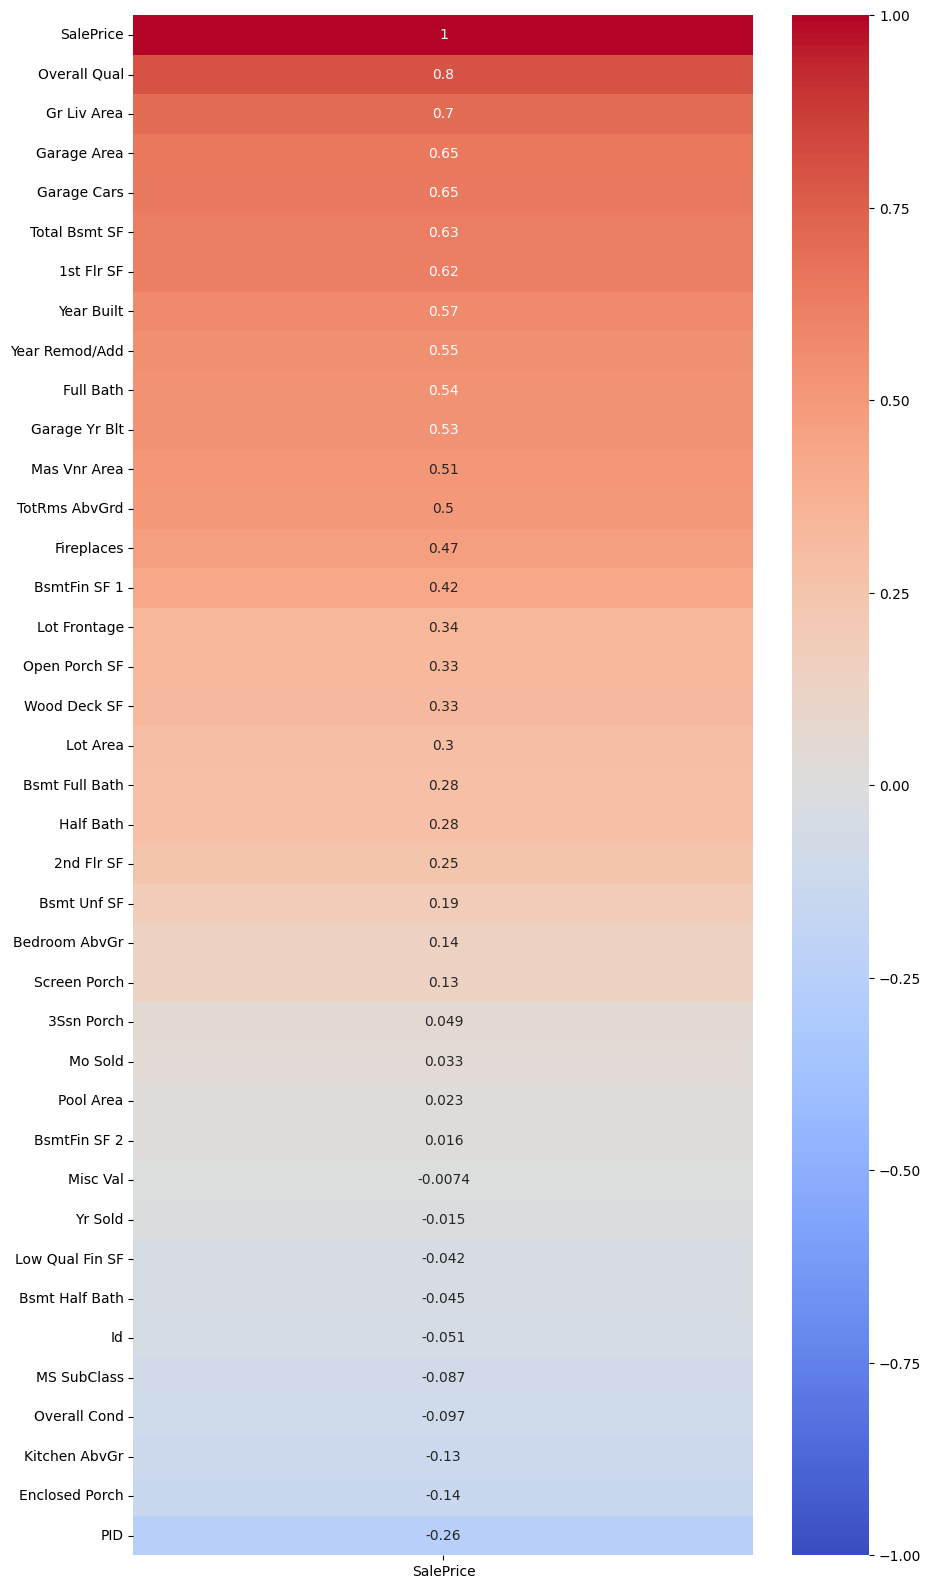

In [8]:
plt.figure(figsize = (10, 20))
sns.heatmap(ames_training.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm', annot = True);

There appears to be no easily apparent "cutoff" for what we might consider to be highly correlated. We can take a token from Principal Component Analysis (thanks to DSB Lead Instructor Matt Brems for mentioning this well in advance of our PCA lesson) to determine which features are worth considering for a regression analysis. The "elbow method" advocates plotting the features (sorted by correlation) on line plot or bar chart and identifying sharp drops between items. Where "the elbow bends," we would call our cutoff.

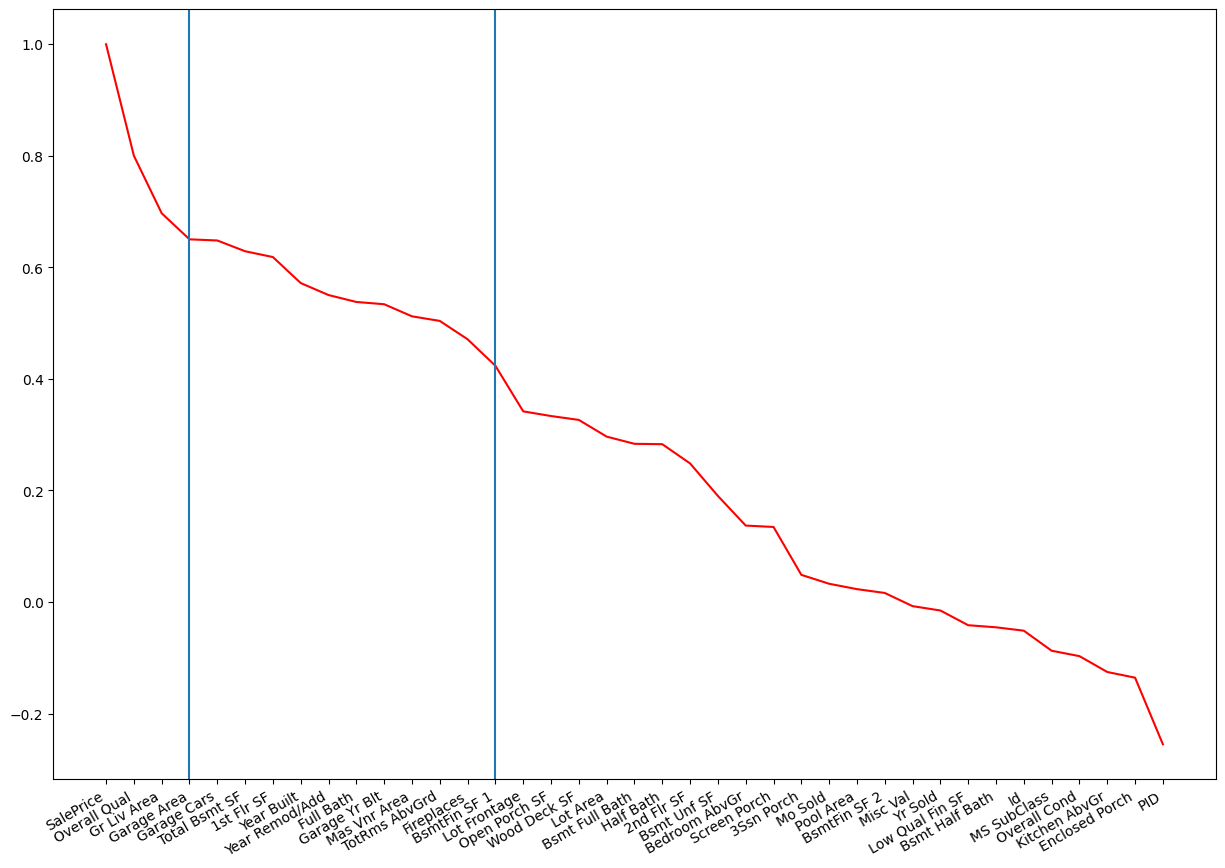

In [9]:
plt.figure(figsize = (15,10))
plt.plot(ames_training.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).index,
         ames_training.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
         c = 'red')
plt.axvline(x = 3)
plt.axvline(x = 14)
plt.xticks(rotation = 30, ha = 'right');

Ignoring the initial "elbow" at `Overall Qual` which occurs for the obvious reason of nothing correlating as well to `SalePrice` as it does to itself, we have a very "early elbow" at the `Garage Area` feature, but we can imagine that a multiple linear regression model using only three features from a set of 79 would likely be terribly underfit. Instead, we look for our second "elbow," which we identify at the `BsmtFin SF 1` feature, denoting the area of the "1st" finished part of the basement. Note the steep descent from this feature to `Lot Frontage`. Choosing this to be the cutoff for our first multiple linear regression model provides us with 14 features of 79 to play with. Normally, we would seek another "elbow" to filter for strongly anti-correlated features, but seeing as the mostly highly anti-correlated feature has a correlation coefficient of -0.26 (compare that against the 0.42 for our "strong" cutoff), that seems unnecessary here. Incidentally, the only features in our restricted list with null values are now:
* `Garage Area`
* `Garage Cars`
* `Total Bsmt SF`
* `Garage Yr Blt`
* `Mas Vnr Area`
* `BsmtFin SF 1`

Thankfully, most of these have only 1 null value, so we will be able to identify the relevant rows and impute them as necessary.

In [10]:
still_null_corr_columns = ['Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Garage Yr Blt', 'Mas Vnr Area', 'BsmtFin SF 1']
for column in still_null_corr_columns:
    print(column)
    display(ames_training[ames_training[column].isnull()][['PID']])

Garage Area


,PID
1712,910201180


Garage Cars


,PID
1712,910201180


Total Bsmt SF


,PID
1327,903230120


Garage Yr Blt


,PID
28,911103060
53,923226250
65,923202134
79,910201050
101,905476170
...,...
1991,923204150
2010,911175410
2027,535456010
2039,923228220


Mas Vnr Area


,PID
22,528142010
41,528110050
86,531371050
212,528458020
276,908130020
338,528458150
431,907251090
451,528439010
591,533208040
844,533208030


BsmtFin SF 1


,PID
1327,903230120


Two rows appear consistently here: PID 910201180 and 903230120. Let's inspect these two rows individually.

In [11]:
ames_training[ames_training['PID'] == 910201180]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NV,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NV,Detchd,NaN,NV,NaN,NaN,NV,NV,Y,174,0,212,0,0,0,NV,MnPrv,NV,0,3,2007,WD,150909


In [12]:
ames_training[ames_training['PID'] == 903230120]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NV,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NV,0.0,TA,TA,PConc,NV,NV,NV,NV,NaN,NV,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NV,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NV,MnPrv,NV,0,4,2008,ConLD,79000


The null values in our columns of interest are not isolated, as they have other corresponding information. For instance, listing 910201180 has a detached garage, with negligible information regarding it available. In a situation like this, our best option is to assume that the missing data falls within the expectation of our eventual model and simply delete it: we will *hope* that it is Missing Completely at Random (MCAR). In fact, in the interest of time and producing a preliminary model, we will simply remove all of the rows with a null value in any of our columns of interest.

Before proceeding, we check to see whether the testing data carries the same issues.

In [13]:
ames_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [14]:
ames_validation.dropna().shape

(0, 80)

Eliminating all rows with null values from the test set will have the same catastrophic impact. Let's clean the categorical columns of the testing data in the same way we did for the training data.

In [15]:
categorical_columns = ames_training.select_dtypes('object').columns
for column in categorical_columns:
    ames_validation[column].replace(np.nan, "NV", inplace = True)

ames_validation.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NV,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NV,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NV,NV,NV,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NV,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NV,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NV,NV,NV,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NV,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NV,NV,NV,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NV,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NV,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NV,NV,NV,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NV,NV,NV,0,7,2009,WD


Now we can remove the rows that are null in our columns of interest from both the training and testing data sets.

In [16]:
ames_training.dropna(subset = still_null_corr_columns, inplace = True)

In [21]:
ames_validation.replace(np.nan, 0, inplace = True)

In [17]:
ames_training.shape, ames_validation.shape

((1915, 81), (878, 80))

## Fitting our Preliminary Model
We've already fit our baseline model a simple linear regression. This preliminary multiple linear regression model aims to predict the price of a house for sale in Ames using only the native numeric columns in the dataset. We'll perform k-fold cross validation with the typical 5 folds and shuffling to generate this prediction. We can refine our model further by attempting to optimize over the number of folds.

In [18]:
# Specify X and y
X = ames_training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
                   'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
                   'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
                   'Fireplaces', 'BsmtFin SF 1']]
y = ames_training['SalePrice']

# Instantiate our linear regression model
mlr_basic = LinearRegression()

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
mlr_basic.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict using model
preds = mlr_basic.predict(ames_validation[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
                   'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
                   'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
                   'Fireplaces', 'BsmtFin SF 1']])

predictions = ames_validation.copy()
predictions['SalePrice'] = preds
predictions = predictions[['Id', 'SalePrice']]
predictions

,Id,SalePrice
0,2658,146019.860270
1,2718,190799.134871
2,2414,203046.377940
3,1989,121149.754290
4,625,194747.220365
...,...,...
873,1662,200894.715428
874,1234,226154.637672
875,1373,124168.457217
876,1672,99636.719155


In [23]:
predictions.set_index('Id', inplace = True)
predictions.to_csv('../outputs/prediction_on_native_numerical_features.csv')